## Best Practice Analyzer

When you run this notebook, the [Best Practice Analyzer](https://learn.microsoft.com/python/api/semantic-link-sempy/sempy.fabric?view=semantic-link-python#sempy-fabric-run-model-bpa) (BPA) will offer tips to improve the design and performance of your semantic model. 

By default, the BPA checks a set of 60+ rules against your semantic model and summarizes the results. These rules come from experts within Microsoft and the Fabric Community.  

You’ll get suggestions for improvement in five categories: Performance, DAX Expressions, Error Prevention, Maintenance, and Formatting. 

### Powering this feature: Semantic Link
This notebook leverages [Semantic Link](https://learn.microsoft.com/fabric/data-science/semantic-link-overview), a python library which lets you optimize Fabric items for performance, memory and cost. The "[run_model_bpa](https://learn.microsoft.com/python/api/semantic-link-sempy/sempy.fabric?view=semantic-link-python#sempy-fabric-run-model-bpa)" function used in this notebook is just one example of the useful [functions]((https://learn.microsoft.com/python/api/semantic-link-sempy/sempy.fabric)) which Semantic Link offers.

You can find more [functions](https://github.com/microsoft/semantic-link-labs#featured-scenarios) and [helper notebooks](https://github.com/microsoft/semantic-link-labs/tree/main/notebooks) in [Semantic Link Labs](https://github.com/microsoft/semantic-link-labs), a Python library that extends Semantic Link's capabilities to automate technical tasks.

### Low-code solutions for data tasks
You don't have to be a Python expert to use Semantic Link or Semantic Link Labs. Many functions can be used simply by entering your parameters and running the notebook.


#### Import the Semantic Link library

In [3]:
import sempy.fabric as fabric

dataset = "acquisitions 3" # Enter the name or ID of the semantic model
workspace = "First investments" # Enter the workspace name or ID in which the semantic model exists

StatementMeta(, 9f72ed83-32e8-41a1-b809-e2cea9a4d1e9, 6, Finished, Available, Finished)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 4, Finished, Available, Finished)

In [3]:
path="./builtin/offices.csv"
dfs=pd.read_csv(path)
dfs.head(5)

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 5, Finished, Available, Finished)

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


In [4]:
path="./builtin/funds.csv"
dfs=pd.read_csv(path)
dfs.head(5)

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 6, Finished, Available, Finished)

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD,http://venturebeat.com/2008/07/28/us-venture-p...,U.S. Venture Partners raises $625M fund for ne...,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,http://venturebeat.com/2008/05/20/disneys-stea...,Venture Beat,2009-01-03 09:51:58,2013-09-03 16:34:54


In [5]:
path="./builtin/acquisitions.csv"
dfs=pd.read_csv(path)
dfs.head(5)

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 7, Finished, Available, Finished)

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [13]:
path="./builtin/offices.csv"
dfs=pd.read_csv(path)
dfs.head(5)
fig = px.scatter(dfs, x='longitude', y='latitude')
fig.show()

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 15, Finished, Available, Finished)

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 14, Finished, Available, Finished)

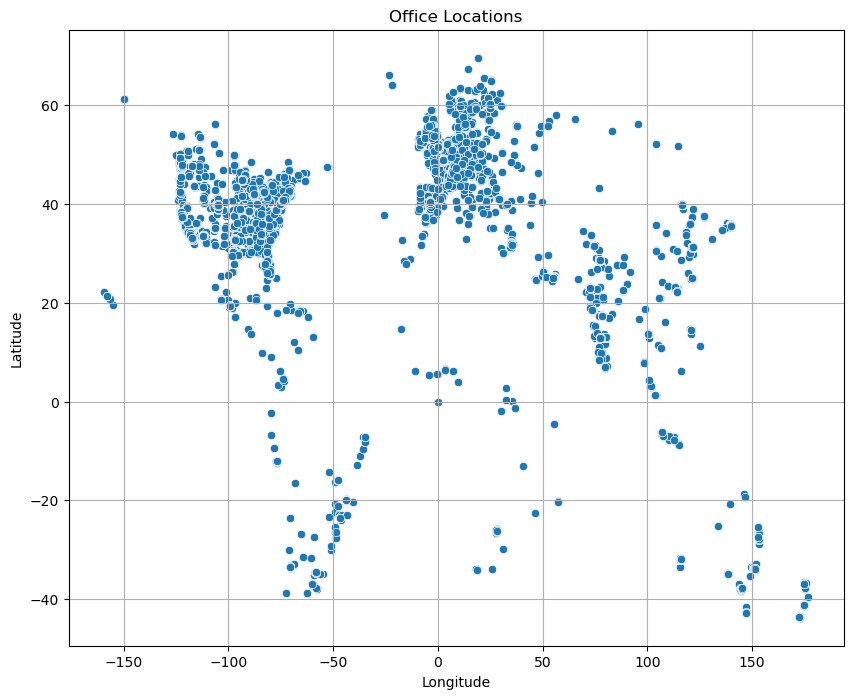

In [12]:
path="./builtin/offices.csv"

offices_df = pd.read_csv(path)

# Now offices_df is defined and can be used
if 'longitude' in offices_df.columns and 'latitude' in offices_df.columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=offices_df, x='longitude', y='latitude')
    plt.title('Office Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
else:
    print("\n'longitude' or 'latitude' column not found in offices data.")

In [14]:


path="./builtin/offices.csv"

offices_df = pd.read_csv(path)

# Assuming 'country_code' is a categorical column
if 'country_code' in offices_df.columns:
    country_counts = offices_df['country_code'].value_counts().reset_index()
    country_counts.columns = ['country_code', 'count']

    fig = px.bar(country_counts, x='country_code', y='count',
                 title='Number of Offices per Country')
    fig.show()
else:
    print("\n'country_code' column not found in offices data.")

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 16, Finished, Available, Finished)

In [15]:
import pandas as pd
import plotly.express as px

path="./builtin/funds.csv"
funds_df = pd.read_csv(path)

if 'created_at' in funds_df.columns:
    # Convert 'created_at' to datetime objects
    funds_df['created_at'] = pd.to_datetime(funds_df['created_at'], errors='coerce')

    # Group by date and count funds
    funds_over_time = funds_df.groupby(funds_df['created_at'].dt.date).size().reset_index(name='count')
    funds_over_time.columns = ['date', 'count']

    fig = px.line(funds_over_time, x='date', y='count',
                  title='Number of Funds Created Over Time')
    fig.update_layout(xaxis_title='Date', yaxis_title='Number of Funds')
    fig.show()
else:
    print("'created_at' column not found in funds data.")

StatementMeta(, 5e94f24d-32c5-4ffa-90d2-dd4743883492, 17, Finished, Available, Finished)

StatementMeta(, 2d3bb315-1144-480f-b082-c0eab01f9b71, 3, Finished, Available, Finished)

Offices data loaded successfully.

--- Distribution of Offices by State/Region ---


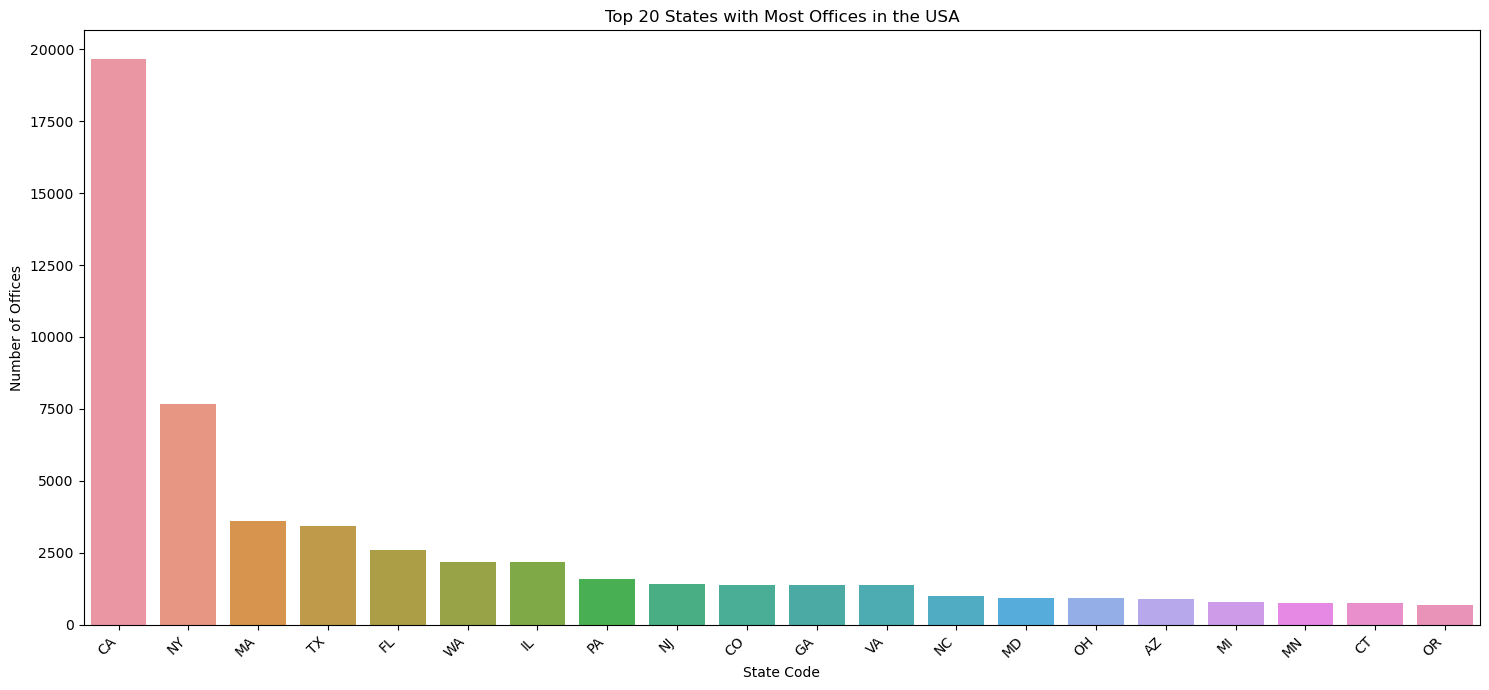

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

path="./builtin/offices.csv"
try:
    offices_df = pd.read_csv(path)
    print("Offices data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file {path} was not found.")
    offices_df = None # Set to None if file not found to prevent further errors

if offices_df is not None:
    # 1. Distribution of offices by state/region (assuming 'state_code' exists)
    print("\n--- Distribution of Offices by State/Region ---")
    if 'state_code' in offices_df.columns and 'country_code' in offices_df.columns:
        # Focus on a country with state data, e.g., USA ('USA')
        us_offices = offices_df[offices_df['country_code'] == 'USA'].copy() # Use .copy() to avoid SettingWithCopyWarning

        if not us_offices.empty:
            state_counts = us_offices['state_code'].value_counts().reset_index()
            state_counts.columns = ['state_code', 'count']

            plt.figure(figsize=(15, 7))
            sns.barplot(x='state_code', y='count', data=state_counts.head(20)) # Show top 20 states
            plt.title('Top 20 States with Most Offices in the USA')
            plt.xlabel('State Code')
            plt.ylabel('Number of Offices')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("No offices found for country code 'USA' or 'state_code' is missing for USA offices.")

In [3]:
path="./builtin/offices.csv"
try:
    offices_df = pd.read_csv(path)
    print("Offices data loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file {path} was not found.")
    offices_df = None # Set to None if file not found to prevent further errors

if offices_df is not None:
# 2. Choropleth map of offices per country (using Plotly)
    print("\n--- Choropleth Map of Offices per Country ---")
    if 'country_code' in offices_df.columns:
        country_counts = offices_df['country_code'].value_counts().reset_index()
        country_counts.columns = ['country_code', 'count']

        # Note: px.choropleth requires country codes that match its internal mapping.
        # You might need to adjust country codes if they don't match standard ISO alpha-3 codes.
        try:
            fig = px.choropleth(country_counts,
                                locations='country_code',
                                locationmode='country names', # Or 'ISO-3' if using ISO codes
                                color='count',
                                hover_name='country_code',
                                color_continuous_scale=px.colors.sequential.Plasma,
                                title='Most Offices by Country')
            fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0}) # Adjust margins
            fig.show()
        except ValueError as e:
             print(f"Could not create choropleth map. Ensure 'country_code' column contains standard country names or ISO-3 codes. Error: {e}")

    else:
        print("'country_code' column not found for choropleth map.")

StatementMeta(, 2d3bb315-1144-480f-b082-c0eab01f9b71, 5, Finished, Available, Finished)

Offices data loaded successfully.

--- Choropleth Map of Offices per Country ---


#### Run the Best Practice Analyzer on your semantic model

#### Learn more about notebooks in Fabric
Notebooks in Fabric empower you to use code and low-code solutions for a wide range of data analytics and data engineering tasks such as data transformation, pipeline automation, and machine learning modeling.

* To edit this notebook, switch the mode from **Run** only to **Edit** or **Develop**.
* You can safely delete this notebook after running it. This won’t affect your semantic model.
* This notebook uses Python, which is currently a preview experience. For a General Availability experience, you can change the language to PySpark from the language dropdown menu in the Home tab.


For more information on capabilities and features, check out [Microsoft Fabric Notebook Documentation](https://learn.microsoft.com/fabric/data-engineering/how-to-use-notebook).
